In [46]:
import torch
from torch.autograd import Variable
from torchvision import transforms, datasets

import matplotlib.pyplot as plt


In [47]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.cnn1 = torch.nn.Conv2d(1, 20, 5, stride=1)
        self.pool2 = torch.nn.MaxPool2d(2, stride=2)
        self.fc3 = torch.nn.Linear(2880, 100)
        self.fc4 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.cnn1(x)
        x = self.pool2(x)
        x = x.view(x.shape[0], -1)
        x = torch.nn.functional.relu(self.fc3(x))
        x = torch.nn.functional.relu(self.fc4(x))

        return torch.nn.functional.log_softmax(x, dim=1)

In [48]:
batch_size=200
learning_rate=0.01
epochs=10
log_interval=100

In [49]:
train_loader = torch.utils.data.DataLoader(
                datasets.MNIST('../data', train=True, download = True,
                               transform= transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))])),
                                  batch_size = batch_size, shuffle=True )

test_loader = torch.utils.data.DataLoader(
                datasets.MNIST('../data', train=False, download = True,
                               transform= transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))])),
                                  batch_size = batch_size, shuffle=True)



In [50]:
net = Net()
print(net)

Net(
  (cnn1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Linear(in_features=2880, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


In [51]:
optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate, momentum = 0.9)
criterion = torch.nn.NLLLoss()

In [52]:
losses = []
for epoch in range(epochs):

    total_loss = 0.0


    for step, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        net.train()
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.data
        losses.append(loss.detach().numpy())

        if step and step % log_interval == 0:
          print(f'Train Epoch: {epoch+1} | Loss: {loss.data} | Avg. loss: {total_loss / len(train_loader.dataset)}')

Train Epoch: 1 | Loss: 0.7065979242324829 | Avg. loss: 0.0018480410799384117
Train Epoch: 1 | Loss: 0.8724032044410706 | Avg. loss: 0.0032683550380170345
Train Epoch: 2 | Loss: 0.7367336750030518 | Avg. loss: 0.0010163085535168648
Train Epoch: 2 | Loss: 0.5595009326934814 | Avg. loss: 0.001979114254936576
Train Epoch: 3 | Loss: 0.1387152075767517 | Avg. loss: 0.000675704563036561
Train Epoch: 3 | Loss: 0.09531861543655396 | Avg. loss: 0.0008735238225199282
Train Epoch: 4 | Loss: 0.03194373846054077 | Avg. loss: 0.00012589262041728944
Train Epoch: 4 | Loss: 0.10108279436826706 | Avg. loss: 0.0002413194306427613
Train Epoch: 5 | Loss: 0.030455822125077248 | Avg. loss: 8.939902181737125e-05
Train Epoch: 5 | Loss: 0.018429948017001152 | Avg. loss: 0.00017295904399361461
Train Epoch: 6 | Loss: 0.021852606907486916 | Avg. loss: 6.783705612178892e-05
Train Epoch: 6 | Loss: 0.05260612443089485 | Avg. loss: 0.00013765248877462
Train Epoch: 7 | Loss: 0.014880641363561153 | Avg. loss: 5.305563536

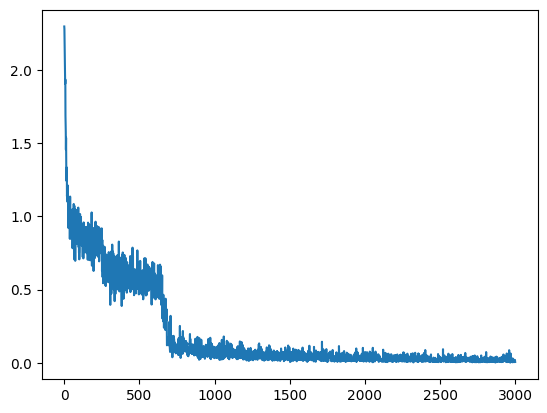

In [53]:
plt.plot(losses)
plt.show()

In [54]:
test_loss = 0.0
correct = 0.0
for data, target in test_loader:
    net_out = net(data)
    test_loss += criterion(net_out, target).data
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print(f'Test: Average loss: {test_loss} | Accuracy: {correct / len(test_loader.dataset)}')

Test: Average loss: 0.00021427306637633592 | Accuracy: 0.9853000044822693
